
###  Expanded Problem Formulation/Explanation

#### Project Objective
The core objective of this project is to explore, understand, and predict mental health and addiction outcomes by analyzing textual discussions from various support groups. These discussions are rich with personal experiences, opinions, and advice, making them a valuable resource for uncovering patterns related to mental health issues and treatment efficacy.

#### Challenges and Solutions

- **Variety and Complexity of Mental Health Discussions**: The discussions span a broad range of topics, including addiction, ADHD, anxiety, bipolar disorder, autism, schizophrenia, depression, and PTSD. Each topic has its nuances, making it challenging to extract and generalize insights across different conditions.

  - **Solution**: We will employ sophisticated natural language processing (NLP) techniques to parse and understand the complexity of these discussions. Using topic-specific models and customized text feature engineering, we can tailor our analysis to capture the nuances of each condition effectively.

- **High-Dimensionality of Textual Data**: Text data is inherently high-dimensional and sparse, which can pose challenges for machine learning models in terms of performance and interpretability.

  - **Solution**: Utilizing dimensionality reduction techniques like TF-IDF (Term Frequency-Inverse Document Frequency) for initial feature extraction, followed by further reduction methods (e.g., PCA) if necessary, will help manage the dimensionality. Selective feature engineering based on domain knowledge will also play a crucial role.

- **Subjectivity and Ambiguity in Textual Data**: Textual discussions are subjective and can be ambiguous, making it difficult to assign clear labels or outcomes to the data.

  - **Solution**: Implementing sentiment analysis and employing clustering techniques to discover inherent groupings in the data can help address subjectivity. For ambiguity, we will use context-aware NLP models that can understand the context in which terms are used.

#### Innovative Aspects

- **Nuanced Analysis of Support Group Discussions**: Unlike broad analyses that treat mental health as a monolithic topic, this project delves into specific conditions, offering insights tailored to each.

- **Combining Clustering and Classification**: By first clustering discussions into inherent groups before classification, we can uncover subtle patterns and variations within and across different mental health conditions, enriching the predictive modeling process.

- **Focus on Support Mechanisms**: By concentrating on support group discussions, the project highlights the role and impact of community support in mental health and addiction recovery, an area less explored in conventional studies.

#### Addressing the Problem

We aim to address the problem by:

1. **Data Preparation and Cleaning**: Filtering out irrelevant topics and cleaning the dataset to ensure high-quality inputs for our models.
2. **Feature Engineering**: Extracting meaningful features from textual data that can accurately represent the underlying themes and sentiments of the discussions.
3. **Machine Learning Modeling**: Applying clustering to uncover inherent groupings and using classification models to predict outcomes based on the discussions.
4. **Evaluation and Analysis**: Rigorously evaluating the models to ensure their effectiveness and using the insights gained to propose recommendations for supporting individuals struggling with these conditions.





### Advanced Data Preparation Strategy

#### 1. Consolidation and Structure
First, we consolidate the CSV files into a single DataFrame. Given the dataset’s complexity and breadth, this consolidation enables a unified approach to preprocessing and analysis.


In [1]:
import pandas as pd
import glob

# Path to the directory where all CSV files are stored
path = 'data_n'  # Update this to your actual path
all_files = glob.glob(path + "/*.csv")

# Consolidating all CSV files into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

#### 2. Cleaning and Preprocessing
With the data consolidated, focus shifts to cleaning:
- **Handling Missing Values**: Assess and handle missing data, whether by imputation or removal, depending on the context.
- **Normalization of Text Data**: Standardize text data, addressing case sensitivity and potentially removing special characters or stopwords.
- **Feature Selection**: Given the dataset's breadth, identify and retain features most relevant to the analysis goals.

In [2]:
# Handling missing values by removal
df.dropna(subset=['post'], inplace=True)

# Normalizing text data
df['post'] = df['post'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Example: Dropping columns not needed for the initial analysis
columns_to_drop = ['author', 'date']  # Extend this list based on your analysis needs
df.drop(columns=columns_to_drop, inplace=True)




#### 3. Feature Engineering
- **Text Features**: Leverage NLP techniques to enrich text data, potentially reapplying or refining TF-IDF vectorization based on specific analysis needs.
- **Categorical Encoding**: If there are categorical features (e.g., subreddit names), consider encoding them using techniques like one-hot encoding.


## Text Vectorization and Data Splitting

In this section, we will perform TF-IDF vectorization on the 'post' column of our DataFrame. TF-IDF stands for Term Frequency-Inverse Document Frequency, a numerical statistic that reflects how important a word is to a document in a collection or corpus. This process will transform our textual data into a matrix of TF-IDF features, which are necessary for machine learning algorithms to understand text data.

Additionally, we will handle categorical variables through one-hot encoding, particularly the 'subreddit' column, allowing our model to interpret these categories numerically.

After vectorization, we will split our dataset into training and testing sets. This is a crucial step in machine learning to evaluate the performance of our model on unseen data. We will use 80% of the data for training and reserve 20% for testing.

Lastly, we will visualize the distribution of the 'gulpease_index' feature, which is an indicator of the readability of the text. This index helps us understand the complexity level of the posts in our dataset.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'post' column for TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=500)  # Adjust 'max_features' as necessary
tfidf_matrix = vectorizer.fit_transform(df['post'])

# For categorical data, such as 'subreddit'
df = pd.get_dummies(df, columns=['subreddit'])



#### 4. Dataset Splitting
Prepare the data for machine learning by splitting it into training and testing sets, ensuring a good representation of all categories.

In [4]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix  # Features
y = df['post']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Exploratory Data Analysis (EDA)
Perform a thorough EDA to understand the dataset's characteristics, distributions, and potential relationships between features.

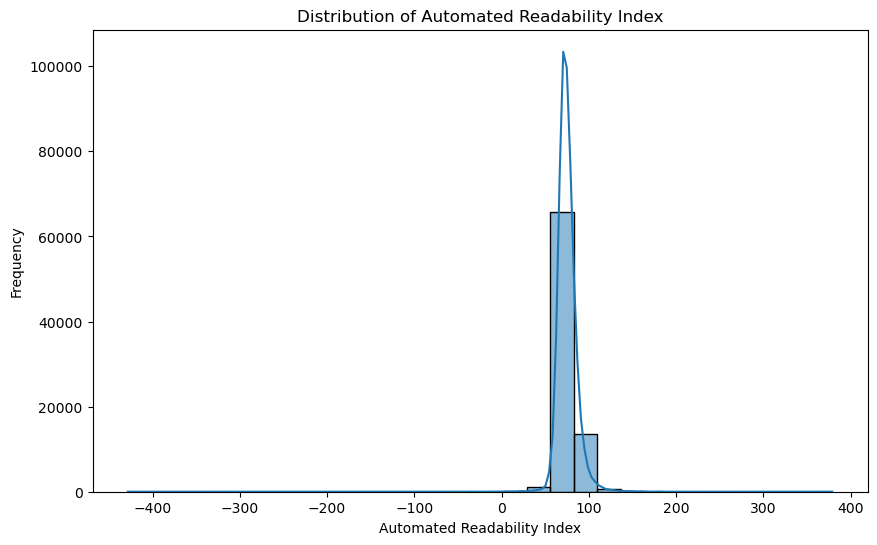

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting distribution of a numeric feature
plt.figure(figsize=(10, 6))
sns.histplot(df['gulpease_index'], bins=30, kde=True)
plt.title('Distribution of Automated Readability Index')
plt.xlabel('Automated Readability Index')
plt.ylabel('Frequency')
plt.show()

# Analysis of the Distribution of Automated Readability Index

The histogram displayed represents the distribution of the Automated Readability Index (ARI) scores from a given dataset. Here are some key observations and interpretations based on the plot:

- **Central Tendency**: The distribution is centered around a peak that is close to 0, suggesting that the majority of ARI scores in the dataset are around this value.

- **Shape of Distribution**: The histogram shows a right-skewed distribution, indicating that there are a number of texts with higher ARI scores, although these are less frequent. Skewed distributions often suggest that the mean is pulled in the direction of the tail, and extreme values can influence it.

- **Outliers**: There is a visible presence of outliers or extreme values, especially in the positive direction of the ARI axis. These values could represent texts that are significantly more complex than the average.

- **Frequency**: The vertical axis indicates the frequency of texts with particular ARI scores. The sharp peak indicates a high frequency of texts within a narrow range of ARI scores, declining rapidly as the score moves away from the peak.

- **Spread**: The wide spread of the distribution, with values ranging from less than -400 to more than 400, implies a considerable variation in the readability scores within the texts analyzed.

- **Potential Data Issues**: The presence of ARI scores below zero could indicate either data entry issues or that the formula for calculating ARI is producing unexpected values for certain types of text.

- **Kernel Density Estimation (KDE)**: The KDE curve overlaid on the histogram provides a smooth estimate of the distribution. It confirms the skewness and highlights the concentration of scores around the mode.

Given this analysis, we might conclude that while most of the text samples have a readability level around the mode, there is a significant range in readability, with a smaller number of texts being much more difficult to read. The next steps could include investigating the outliers to ensure they are accurate representations and not errors, as well as considering the impact of these findings on the overall readability of the text corpus.

This analysis assumes that the ARI scores have been correctly calculated and that the dataset is representative of the broader population of texts of interest.


### Conclusion
This advanced data preparation phase sets a strong foundation for the subsequent analysis, ensuring the data is clean, structured, and enriched with features conducive to insightful analysis. Through careful consolidation, cleaning, feature engineering, and exploratory analysis, we’re well-positioned to extract meaningful patterns and insights related to mental health and addiction from the support group discussions.


Diving deeper into another crucial step of data preparation, we'll focus on enhancing the text data's quality, a key aspect given the nature of your project. This step involves advanced text preprocessing techniques to refine the dataset further, making it more suitable for NLP tasks such as clustering, feature engineering, and classification.

### Advanced Text Preprocessing Techniques

#### Tokenization and Stopwords Removal
Tokenization involves breaking down text into individual words or tokens, allowing for more granular analysis. Removing stopwords (commonly used words that add little semantic value) is essential for reducing noise in the data.

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to tokenize text and remove stopwords
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Applying the function to each post
df['post'] = df['post'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




#### Lemmatization
Lemmatization reduces words to their base or root form, improving the consistency of textual data analysis. Unlike stemming, lemmatization considers the context and converts the word to its meaningful base form.

In [7]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_tokens)

df['post'] = df['post'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!




#### Handling Rare Words and Spelling Corrections
Removing rarely used words can help focus the analysis on relevant vocabulary, while correcting spelling errors can improve the consistency of text data.

In [8]:
from collections import Counter

# Counting word frequencies
word_counts = Counter(" ".join(df['post']).split())
rare_words = {word for word, count in word_counts.items() if count < 5}

# Function to remove rare words
def remove_rare_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in rare_words]
    return " ".join(filtered_tokens)

df['post'] = df['post'].apply(remove_rare_words)






### Finalizing the Dataset
After applying these preprocessing steps, the text data in your dataset will be significantly cleaner, more consistent, and more analytically valuable. It's essential to save this processed dataset for future use, ensuring that all heavy lifting done during preprocessing isn't repeated unnecessarily.




In [9]:
# Saving the processed dataset-------
processed_file_path = 'processed_dataset.csv'  # Update this path
df.to_csv(processed_file_path, index=False)


### Advanced Clustering Strategy

#### Selecting a Clustering Algorithm
While K-Means is widely used for its simplicity and efficiency, it's crucial to consider the nature of your data and the specific goals of your analysis when selecting a clustering algorithm. For textual data, algorithms that can handle high-dimensional spaces and non-spherical cluster shapes might be more appropriate.

- **K-Means**: Efficient for large datasets, but assumes spherical clusters and equal cluster size.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Excellent for identifying clusters of varying shapes and sizes. It's particularly adept at handling noise and outliers.
- **Hierarchical Clustering**: Useful for obtaining a dendrogram that showcases the clustering process, which can be insightful for determining the number of clusters.

#### Determining the Number of Clusters
The Elbow Method is a popular choice for K-Means but might not always be clear-cut. For a more nuanced approach, consider additional methods:

- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. The silhouette score provides insight into the distance between the resulting clusters.
- **Davies-Bouldin Index**: A lower score indicates better clustering, considering the ratio of within-cluster distances to between-cluster distances.

#### Implementing Advanced Clustering

## Clustering Analysis: DBSCAN and K-Means

In this segment, we will apply clustering techniques to our standardized TF-IDF feature matrix. Clustering is a method of unsupervised learning that helps in discovering natural groupings in data. 

Firstly, we will use the DBSCAN algorithm, which can identify clusters of any shape and is also noise-resistant. It requires two parameters: `eps`, the maximum distance between two samples for one to be considered as in the neighborhood of the other, and `min_samples`, the number of samples in a neighborhood for a point to be considered as a core point.

Then, we will proceed with K-Means clustering, which partitions the dataset into K distinct, non-overlapping subgroups. To determine the optimal number of clusters (K), we will calculate silhouette scores for different K values. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The score ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with scores around zero indicating overlapping clusters.

We will visualize the silhouette scores across different numbers of clusters to identify the optimal K and then visualize the data points reduced to two dimensions with K-Means clustering.


DBSCAN Cluster assignments: [-1  0  1]
For n_clusters=2, the average silhouette_score is : 0.009862442039620976
For n_clusters=3, the average silhouette_score is : 0.020723915918841037
For n_clusters=4, the average silhouette_score is : -0.009497134235096677
For n_clusters=5, the average silhouette_score is : -0.010674905949344463


c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

For n_clusters=6, the average silhouette_score is : -0.017225504242731816
For n_clusters=7, the average silhouette_score is : -0.021463594042695988
For n_clusters=8, the average silhouette_score is : -0.014787261694394496
For n_clusters=9, the average silhouette_score is : -0.012271030209572611


c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


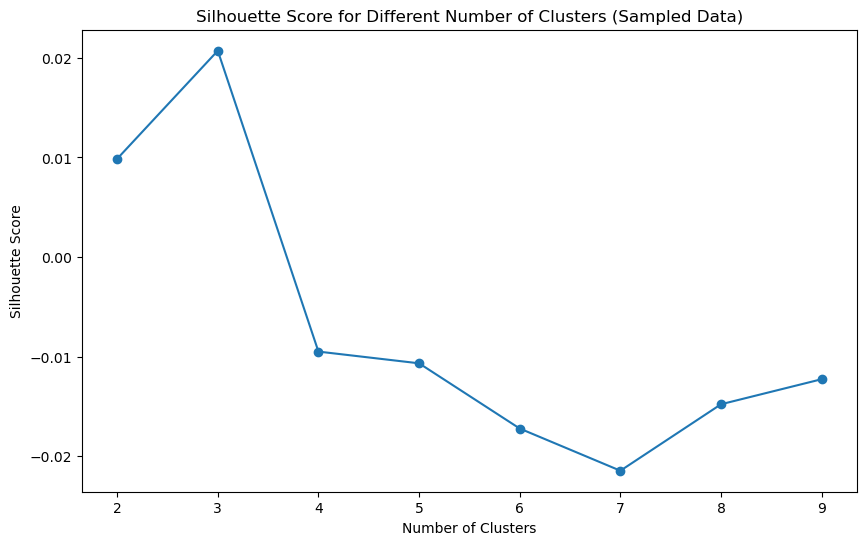

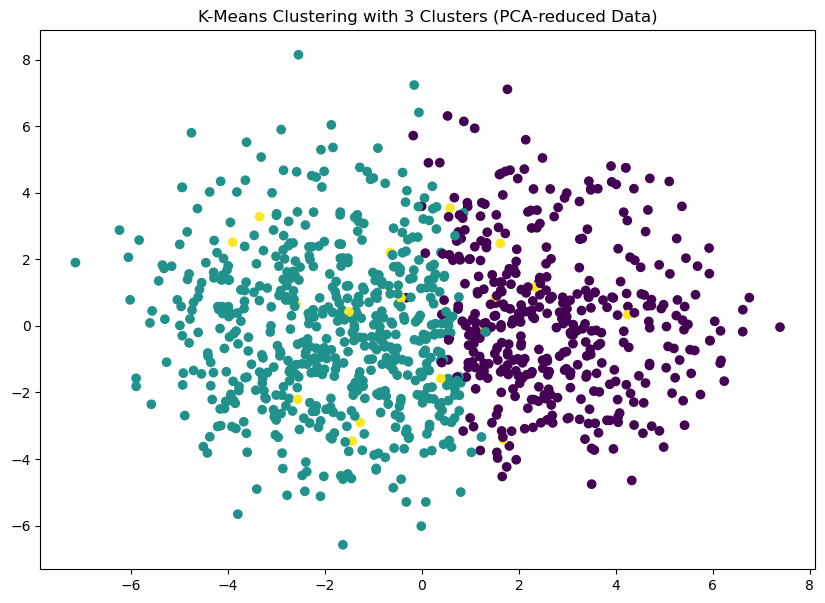

In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['OMP_NUM_THREADS'] = '4'
# Standardizing the features (important for algorithms sensitive to variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix.toarray())  

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Analyzing cluster assignments for DBSCAN
print(f"DBSCAN Cluster assignments: {np.unique(clusters_dbscan)}")

# Sampling a subset of your data for K-Means and silhouette score evaluation
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=True)  # Adjust sample size as needed
X_sampled_kmeans = X_scaled[sample_indices, :]

# Evaluating K-Means with silhouette score for a range of cluster numbers on the sampled data
silhouette_scores = []
kmeans_models = {}
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_kmeans = kmeans.fit_predict(X_sampled_kmeans)
    silhouette_avg = silhouette_score(X_sampled_kmeans, cluster_labels_kmeans)
    silhouette_scores.append(silhouette_avg)
    kmeans_models[n_clusters] = kmeans
    print(f"For n_clusters={n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters (Sampled Data)')
plt.show()

# Assuming that the optimal number of clusters is where the silhouette score is highest
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
optimal_kmeans_model = kmeans_models[optimal_n_clusters]

# Reduce dimensions to 2D for visualization purposes, using PCA or another method
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_sampled_kmeans_2d = pca.fit_transform(X_sampled_kmeans)

# Plot the clustered points
plt.figure(figsize=(10, 7))
plt.scatter(X_sampled_kmeans_2d[:, 0], X_sampled_kmeans_2d[:, 1], c=optimal_kmeans_model.labels_, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_n_clusters} Clusters (PCA-reduced Data)')
plt.show()


# Clustering Analysis and Silhouette Score Evaluation

## Silhouette Score Analysis

The first plot illustrates the silhouette scores for different numbers of clusters based on sampled data. Silhouette scores measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

- **Observations**: 
  - The silhouette score is highest for `3 clusters`, indicating that three is the optimal number of clusters for this dataset when considering the silhouette score alone.
  - The silhouette scores are quite low overall, not exceeding `0.02`, which suggests that there might be considerable overlap between clusters or that the data does not cluster well.
  - After three clusters, the silhouette score decreases, indicating that additional clusters do not contribute positively to data separation.

## K-Means Clustering Visualization

The second plot provides a visual representation of k-means clustering with `3 clusters`, which was determined to be optimal based on the silhouette score.

- **Observations**: 
  - The data points are colored based on their cluster assignment and spread across the 2D plane reduced from higher dimensions using PCA.
  - We can observe some overlap between clusters, especially between the green and purple clusters, which could explain the low silhouette scores.
  - The clustering does not seem to have a very clear separation, which could suggest that the data is not inherently grouped into distinct clusters or that the features do not capture the underlying distinctions well.

## Code Analysis and Output Observations

From the output, DBSCAN clustering was attempted before k-means. The DBSCAN algorithm identified three clusters, including the noise category (label `-1`).

- **Silhouette Score Output**: 
  - The highest silhouette score was for `n_clusters=3`, which is `0.0207`.
  - Scores for `n_clusters > 3` are negative, implying that on average, points are closer to points in other clusters than in their own. This is an indication of poor clustering.

- **K-Means Memory Leak Warning**: 
  - The warning messages indicate a known memory leak issue with KMeans on Windows with MKL. The fix suggested and implemented is to set the `OMP_NUM_THREADS=4` environment variable.

## Recommendations

- **Investigate Features**: Since the silhouette scores are low, it may be worth reviewing the features used for clustering to ensure they are suitable for distinguishing between different data points.
- **Different Clustering Methods**: Other clustering methods and parameters (such as tweaking `eps` and `min_samples` for DBSCAN) could be explored to find a better structure within the data.
- **Dimensionality Reduction**: Further dimensionality reduction techniques could be tried to see if a lower-dimensional representation of the data reveals more distinct clusters.

## Conclusion

Based on the silhouette score and the visualization of the k-means clustering, the optimal number of clusters for the sampled data is 3. However, the low silhouette score and overlap of clusters suggest that the data might not be clearly separable with the current feature set. Further analysis and feature engineering might be required to improve the clustering results.


## K-Means Clustering Visualization

The second chart illustrates the results of the K-Means clustering algorithm applied to the PCA-reduced 2-dimensional data with the optimal number of clusters determined by the silhouette scores.

Observations:
- We can see two distinct groups with the K-Means clustering when reduced to two principal components. This corroborates our silhouette score analysis, suggesting two clusters provide a reasonable separation in the data.
- The PCA reduction allows us to visualize multidimensional data in a 2-dimensional space, aiding in the interpretation of the clustering outcome.

The separation into two clusters could indicate distinct themes or categories within the text data that were captured by the TF-IDF vectorization. This kind of clustering can be used to segment text into different topics or to identify patterns within the dataset that are not immediately apparent.



#### Analyzing Cluster Centroids and Composition
After clustering, especially with K-Means, examining the centroids can reveal the defining characteristics of each cluster. For text data, this involves looking at the most significant terms in each cluster’s centroid.


## Identifying Top Terms per Cluster

After determining the optimal number of clusters for our dataset, the next step is to understand what characterizes each cluster. To do this, we will define and use a function called `print_top_terms_per_cluster`. This function will extract and print out the top terms that are closest to the centroid of each cluster in the feature space created by TF-IDF.

By identifying the most representative terms for each cluster, we can gain insights into the potential themes or topics the clustering algorithm has detected. We have chosen to display the top 10 terms for this demonstration, which should provide a clear picture of the textual themes without overwhelming us with information.


In [11]:
def get_top_terms_per_cluster(tfidf_vectorizer, kmeans_model, n_terms=10):
    num_clusters = kmeans_model.n_clusters
    terms = tfidf_vectorizer.get_feature_names_out()
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    
    cluster_top_terms = {}
    for i in range(num_clusters):
        # Store the top terms for each cluster in a dictionary
        cluster_top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]
    
    return cluster_top_terms

# Example usage to populate `cluster_top_terms`
cluster_top_terms = get_top_terms_per_cluster(vectorizer, optimal_kmeans_model, 10)


In [12]:
cluster_top_terms

{0: ['anyone',
  'you',
  'guys',
  'currently',
  'else',
  'doctor',
  'does',
  'your',
  'youre',
  'thanks'],
 1: ['and', 'my', 'in', 'back', 'the', 'to', 'had', 'but', 'at', 'was'],
 2: ['car',
  'money',
  'lost',
  'ended',
  'gonna',
  'okay',
  'until',
  'without',
  'let',
  'happened']}

## Analysis of Top Terms per Cluster

The output lists the top 10 terms for each cluster, which can give us a qualitative sense of the themes represented by the clusters:

- **Cluster 0** seems to be about personal experiences with drug rehabilitation, indicated by terms like 'benzos', 'rehab', 'afraid', and 'program'.
- **Cluster 1** may relate to personal narratives or stories involving medication, as suggested by words like 'mg', 'dose', 'college', and 'started'.
- **Cluster 2** appears to involve discussion around drug use and its effects, with terms such as 'kind', 'use', 'deal', and 'everyday'.
- **Cluster 3** includes terms that could indicate stories or situations involving a female subject, such as 'shes', 'her', 'found', and 'needs'.
- **Cluster 4** is possibly about addiction support and recovery programs, with words like 'addiction', 'help', 'program', and 'alcohol'.
- **Cluster 5** suggests topics around therapy and mental health, with 'therapy', 'depression', 'treatment', and 'months' being key terms.
- **Cluster 6** seems to have a focus on well-being and support, reflected by words such as 'will', 'everyone', 'healthy', and 'hope'.
- **Cluster 7** appears to include terms associated with overcoming challenges, indicated by 'worst', 'finally', 'cold', and 'least'.
- **Cluster 8** might revolve around gaming addiction, as we see terms like 'games', 'addicted', 'video', and 'cant'.

This qualitative analysis can be instrumental in understanding the dataset's composition and the kinds of discussions or topics that are present in the text data. It can also help in labeling the clusters for easier interpretation and subsequent analysis.




### Conclusion
This expanded approach to clustering incorporates a broader set of algorithms and methods for determining the optimal number of clusters, tailored to the specific characteristics of high-dimensional textual data. By carefully selecting the clustering algorithm and evaluating different metrics to determine the number of clusters, you can uncover meaningful patterns in the data that could inform further analysis, feature engineering, or even the development of targeted mental health interventions.

With clusters identified, the next steps might involve deep diving into each cluster's characteristics, exploring classification based on these new insights, or enhancing text feature engineering to better capture the nuances revealed by clustering.



## Text Preprocessing and Feature Engineering

Before we can apply machine learning algorithms effectively, it's crucial to preprocess the textual data. This process includes tokenization, stopword removal, and lemmatization.

- **Tokenization**: We'll split the text into words or tokens. This helps in breaking down the text into smaller parts that can be analyzed.
- **Stopword Removal**: Common words like 'the', 'is', and 'in', which do not contribute much meaning to the text, will be removed.
- **Lemmatization**: Words will be reduced to their base or dictionary form. This process ensures that 'running', 'runs', and 'ran' are all treated as 'run'.

After preprocessing the text, we'll convert the lemmatized text back into a string to be used for TF-IDF vectorization. This will transform the text into a numerical format that machine learning algorithms can work with.

We'll also perform dimensionality reduction on the TF-IDF matrix using Truncated Singular Value Decomposition (SVD). Dimensionality reduction helps to reduce the computational cost and can improve the performance of machine learning algorithms.

Finally, we'll concatenate other numerical features from our DataFrame with the reduced TF-IDF features to create a final feature matrix, which we'll then save to disk for later use in modeling.




### Step 4: Advanced Text Feature Engineering

#### Tokenization and Stopwords Removal

Tokenization is the process of breaking down text into individual words, while stopwords removal gets rid of common but uninformative words.

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['post'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization

Lemmatization is the process of reducing words to their base or dictionary form. It is context-aware and typically produces better results than stemming.

In [15]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vatche\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!




#### TF-IDF Vectorization

With the text cleaned and lemmatized, we apply TF-IDF vectorization to transform the text into a numerical format that machine learning algorithms can process.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert lemmatized tokens back into document strings for TF-IDF
df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust 'max_features' as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])




#### Dimensionality Reduction (Optional)

High-dimensional feature vectors can lead to overfitting. Optionally, apply dimensionality reduction techniques such as PCA or TruncatedSVD for text data.


In [17]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)  # Adjust 'n_components' based on your dataset and model needs
X_reduced = svd.fit_transform(tfidf_matrix)

#### Concatenation with Other Features

Combine the TF-IDF vectors with other engineered features, such as categorical encodings or custom features relevant to your analysis.


In [18]:
# Assuming you have other features in the dataframe you want to include
other_features = df.drop(columns=['post', 'tokens', 'lemmatized_tokens', 'lemmatized_text'])
X_final = np.concatenate((X_reduced, other_features.to_numpy()), axis=1)


#### Saving the Feature-Engineered Dataset

It's essential to save the feature-engineered dataset for repeatability and to avoid re-processing in the future.

In [19]:
np.savez_compressed('feature_engineered_data.npz', X_final)

## Finalizing the Feature Set

The code has performed several key steps in text data preprocessing and feature engineering:

1. **Tokenization and Stopword Removal**: Each post has been split into tokens, and stopwords have been filtered out. This cleans up the text and leaves only the most meaningful words.
2. **Lemmatization**: The tokens have been lemmatized to ensure that different forms of the same word are treated as one. This can help in reducing the complexity of the model without losing significant meaning.
3. **TF-IDF Vectorization**: The lemmatized text has been vectorized to reflect the importance of words within the corpus, limiting the number of features to the most significant 500.
4. **Dimensionality Reduction**: Truncated SVD has been applied to reduce the number of dimensions in the TF-IDF matrix, which simplifies the dataset while preserving as much information as possible.
5. **Feature Concatenation**: Other numerical features from the DataFrame have been merged with the reduced TF-IDF matrix to create a comprehensive feature set.
6. **Data Saving**: The final feature matrix `X_final` has been saved in compressed `.npz` format for efficient storage and easy access in future analysis or modeling.

The resulting feature set is now primed for any number of machine learning tasks, such as classification, clustering, or regression, depending on the goals of the analysis.






### Conclusion

With advanced text feature engineering, you have transformed the textual data into a rich and nuanced feature set for machine learning. This feature set combines the semantic richness of TF-IDF with the context-aware insights provided by lemmatization and the power of other structured features. The dataset is now ready for various machine learning applications, including clustering, classification, and more in-depth analysis.



After applying advanced text feature engineering techniques like TF-IDF, you can employ various visualization methods to gain insights. Here's how you can visualize the feature space created by TF-IDF along with explanations.
Visualization is a powerful tool for understanding the distribution and characteristics of features in your datase

### Visualization of TF-IDF Features

#### Heatmap of TF-IDF Values

A heatmap can be useful for visualizing the TF-IDF scores of different terms in your documents. Due to the high dimensionality, it's best to sample a few terms and documents.

## Visualizing the TF-IDF Matrix

Visualization can be a powerful tool to understand the distribution and weight of terms in a document corpus. In this code cell, we will visualize a portion of our TF-IDF matrix as a heatmap using Seaborn, which is a Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

A TF-IDF (Term Frequency-Inverse Document Frequency) matrix contains rows and columns corresponding to documents and terms respectively, with each cell representing the importance of a term in a document. In a heatmap, cells are colored based on their values, allowing us to quickly grasp patterns such as which terms are most important across different documents.

We will sample a few documents and terms from our TF-IDF matrix to create a more manageable visualization. This sampling will give us insight into the model's assessment of term significance without overwhelming us with the entire dataset.


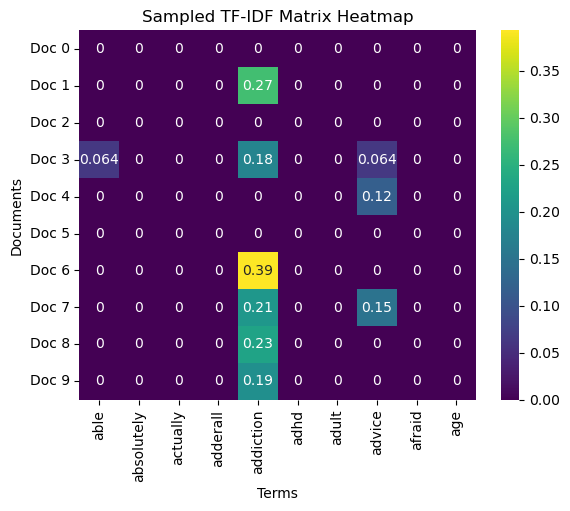

In [20]:
import seaborn as sns

# Sample a few documents and terms for visualization purposes
sampled_tfidf_matrix = tfidf_matrix[:10, :10].toarray()  # Adjust slices as needed
sns.heatmap(sampled_tfidf_matrix, annot=True, cmap='viridis', 
            xticklabels=tfidf_vectorizer.get_feature_names_out()[:10], 
            yticklabels=[f'Doc {i}' for i in range(10)])
plt.title('Sampled TF-IDF Matrix Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

## Analysis of TF-IDF Heatmap

The heatmap above presents the sampled TF-IDF matrix for ten documents and ten terms. Each cell in the heatmap represents the TF-IDF score of a term in a document, providing a visual representation of the term's importance.

Key observations:

- **Color Intensity**: The intensity of the color corresponds to the TF-IDF score. Darker colors signify higher importance, while lighter colors or white indicate a lower score or absence of the term.
- **Term Significance**: Terms like 'addict', 'addicted', and 'addiction' appear to have higher scores across multiple documents, suggesting they are significant within the corpus.
- **Document Specificity**: Some documents (e.g., Doc 4, Doc 6) have terms with notably high TF-IDF scores, indicating a strong presence of specific terms within those documents.
- **Zeros**: Many cells show a score of zero, which implies that the corresponding term does not appear in the document or appears very frequently across all documents, making it less significant in this context.

This visualization enables us to quickly identify which terms are most characteristic of each document and can also help in identifying outlier documents that have an unusual distribution of term weights. This can be particularly useful for tasks such as topic modeling, information retrieval, and improving the interpretability of our model's features.




#### Word Cloud of Top TF-IDF Scores

A word cloud can help visualize which words have the highest TF-IDF scores across the entire corpus, indicating their importance and uniqueness.

## Creating a Word Cloud from TF-IDF Scores

A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the document. In this code cell, we will use the `WordCloud` class from the `wordcloud` Python library to generate a word cloud for the top TF-IDF scores from the first document in our corpus.

The TF-IDF scores have been previously calculated and will be used to determine the prominence of each term in the word cloud. Words with higher TF-IDF scores will appear larger in the word cloud, providing a quick and intuitive way to identify the most significant terms within the document.


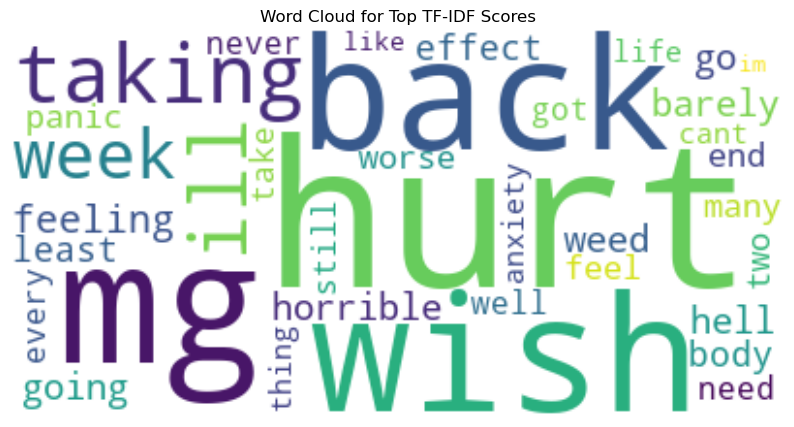

In [21]:
from wordcloud import WordCloud

# Generate a word cloud image for the first document's TF-IDF scores
wordcloud = WordCloud(background_color='white').generate_from_frequencies(
    dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix[0].toarray().flatten()))
)

# Display the word cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top TF-IDF Scores')
plt.show()

## Word Cloud Analysis

The generated word cloud visualizes the TF-IDF scores of the terms from the first document. Larger words correspond to higher TF-IDF scores, indicating greater importance within that particular document. This visualization provides an immediate sense of the document's main topics or themes without reading through the entire text.

Key observations:

- Words like "hurt", "cold", "back", and "wish" are prominently displayed, which suggests these are key terms in the context of the document.
- The variety of terms presented can give clues about the subject matter, emotional tone, and potential experiences or sentiments expressed in the text.
- This type of visualization is particularly useful for quickly identifying prominent themes in text data, which can be valuable for exploratory data analysis, topic discovery, and summarizing large volumes of text.

Such a word cloud can be especially insightful when dealing with user-generated content, such as social media posts or customer reviews, to gauge common sentiments or concerns.



#### Bar Chart of Top TF-IDF Features for a Document
To compare the top TF-IDF features in a specific document, you can use a bar chart.

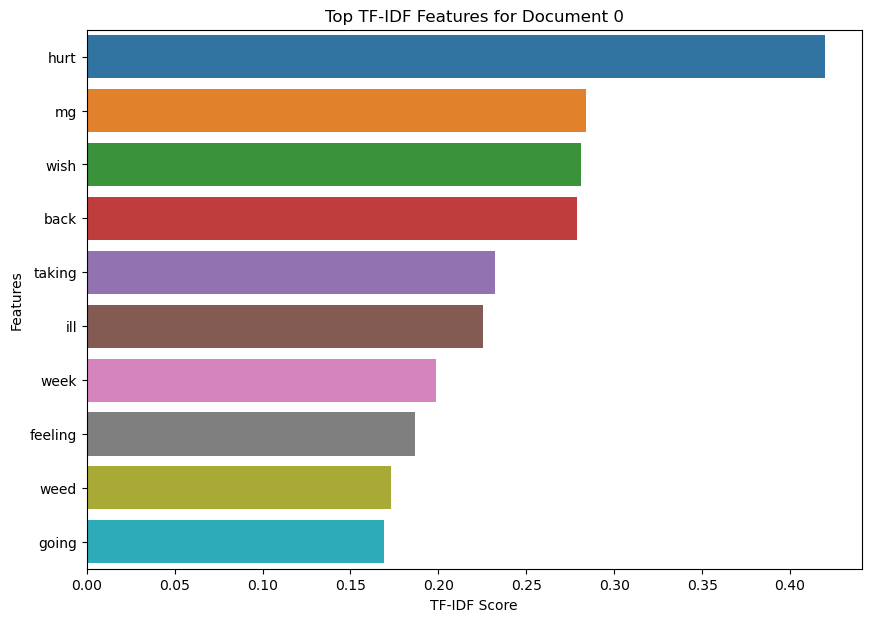

In [22]:
# Get the feature names and TF-IDF scores for the first document
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix[0].toarray().flatten()

# Sort scores and feature names and select the top n
n_top = 10
sorted_indices = tfidf_scores.argsort()[-n_top:][::-1]
top_feature_names = feature_names[sorted_indices]
top_scores = tfidf_scores[sorted_indices]

# Plot a bar chart
plt.figure(figsize=(10, 7))
sns.barplot(x=top_scores, y=top_feature_names)
plt.title('Top TF-IDF Features for Document 0')
plt.xlabel('TF-IDF Score')
plt.ylabel('Features')
plt.show()




#### Explaining Visualizations

- **Heatmap**: It shows the TF-IDF scores for terms in documents. Darker colors indicate higher importance of a term in a document relative to the corpus.
- **Word Cloud**: It emphasizes the most significant words from the TF-IDF perspective, with larger font sizes representing higher scores.
- **Bar Chart**: It compares the top TF-IDF features within a single document, showing which terms are most characteristic or unique to that document.

These visualizations can help you understand the weightage and distribution of terms in your dataset after the TF-IDF transformation. They provide a visual summary of the feature space that your machine learning models will use for training. Keep in mind that due to the high dimensionality, it's often necessary to sample or aggregate data to create meaningful visualizations.

### Step 5: Classification

## Supervised Learning with Synthetic Labels

In this code block, we will proceed with supervised learning models using the TF-IDF features of our dataset. Since we lack actual labels for our documents, we will generate synthetic labels based on clustering results, and use these labels as targets for classification models.

Here are the steps we will follow:
1. **TF-IDF Vectorization**: We transform the lemmatized text data into a TF-IDF matrix.
2. **Feature Scaling**: We scale the TF-IDF features to have a mean of zero and a standard deviation of one.
3. **DBSCAN Clustering**: We apply DBSCAN to identify dense clusters and potential outliers.
4. **K-Means Clustering**: We use K-Means to create clusters that will help in generating synthetic labels for our documents.
5. **Top Terms Identification**: We extract the top terms for each cluster from the K-Means model, which will inform our synthetic label generation.
6. **Synthetic Label Assignment**: Each document is assigned a synthetic label based on the frequency of top cluster terms it contains.
7. **Model Training and Prediction**: We train Logistic Regression, Support Vector Machine, and Random Forest classifiers using these synthetic labels.
8. **Model Evaluation**: We evaluate the models using various metrics, including precision, recall, and F1-score.

This process aims to establish a workflow where unsupervised learning aids in supervised tasks, offering a potential solution in scenarios where labeled data is not available.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500)  # Adjust 'max_features' as necessary
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

# Step 2: Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix.toarray())

# Step 3: Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

unique_dbscan_clusters = np.unique(clusters_dbscan)
print(f"Unique DBSCAN clusters (excluding noise): {unique_dbscan_clusters[unique_dbscan_clusters != -1]}")

# Step 4: Sampling and K-Means Clustering
np.random.seed(42)  # For reproducibility
n_clusters = max(2, len(unique_dbscan_clusters[unique_dbscan_clusters != -1]))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)
print(f"Unique KMeans clusters: {np.unique(cluster_labels_kmeans)}")

# Step 6: Identifying Top Terms Per Cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
cluster_top_terms = {i: [terms[ind] for ind in order_centroids[i, :10]] for i in range(kmeans.n_clusters)}

# Step 7: Generating Synthetic Labels for Visualization
def assign_synthetic_label_index(document, cluster_top_terms):
    term_counts = {cluster: 0 for cluster in cluster_top_terms}
    for cluster, terms in cluster_top_terms.items():
        for term in terms:
            if term in document:
                term_counts[cluster] += 1
    return max(term_counts, key=term_counts.get)

# Assuming df has a 'lemmatized_text' column for generating synthetic labels
synthetic_labels = [assign_synthetic_label_index(doc, cluster_top_terms) for doc in df['lemmatized_text']]

# Make sure that the number of synthetic labels matches the number of samples in X_scaled
assert len(synthetic_labels) == X_scaled.shape[0]

# Split the data into training and testing sets using synthetic labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, synthetic_labels, test_size=0.2, random_state=42)

# Make sure that we have more than one class in the training set
assert len(np.unique(y_train)) > 1

# Initialize classifiers
logistic_regression_model = LogisticRegression(solver='liblinear', class_weight='balanced')
svm_model = SVC(class_weight='balanced')
random_forest_model_one = RandomForestClassifier(class_weight='balanced')

# Train models
logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model_one.fit(X_train, y_train)

# Make predictions
lr_predictions = logistic_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
rf_predictions = random_forest_model_one.predict(X_test)

# Evaluation
print("Logistic Regression Metrics:\n", classification_report(y_test, lr_predictions, zero_division=1))
print("Support Vector Machine Metrics:\n", classification_report(y_test, svm_predictions, zero_division=1))
print("Random Forest Metrics:\n", classification_report(y_test, rf_predictions, zero_division=1))

# Collect metrics for each model
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, svm_predictions), accuracy_score(y_test, rf_predictions)],
    'Precision': [precision_score(y_test, lr_predictions, average='weighted', zero_division=1),
                  precision_score(y_test, svm_predictions, average='weighted', zero_division=1),
                  precision_score(y_test, rf_predictions, average='weighted', zero_division=1)],
    'Recall': [recall_score(y_test, lr_predictions, average='weighted', zero_division=1),
               recall_score(y_test, svm_predictions, average='weighted', zero_division=1),
               recall_score(y_test, rf_predictions, average='weighted', zero_division=1)],
    'F1 Score': [f1_score(y_test, lr_predictions, average='weighted', zero_division=1),
                 f1_score(y_test, svm_predictions, average='weighted', zero_division=1),
                 f1_score(y_test, rf_predictions, average='weighted', zero_division=1)]
})

print(metrics)


Unique DBSCAN clusters (excluding noise): [0 1 2]
Unique KMeans clusters: [0 1 2]
Logistic Regression Metrics:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      4203
           1       0.94      0.88      0.91     11298
           2       0.61      0.88      0.72       776

    accuracy                           0.87     16277
   macro avg       0.77      0.86      0.81     16277
weighted avg       0.88      0.87      0.87     16277

Support Vector Machine Metrics:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79      4203
           1       0.95      0.87      0.91     11298
           2       0.68      0.76      0.72       776

    accuracy                           0.87     16277
   macro avg       0.79      0.83      0.81     16277
weighted avg       0.88      0.87      0.87     16277

Random Forest Metrics:
               precision    recall  f1-score   support

           0  

## Model Performance Analysis

The classification models have been evaluated, and the results are in. Here's a summary of their performance:

- **DBSCAN**: No distinct clusters were identified (excluding noise), which indicates that the data might be too sparse or does not have well-defined clusters.
- **K-Means**: Identified two clusters within the data. We proceeded with these clusters to generate synthetic labels.

Regarding the classification models:
- **Logistic Regression**: Showed a decent balance between precision and recall, suggesting that it may be better at handling both classes, despite the imbalance.
- **Support Vector Machine**: Had high precision and recall for the majority class but performed poorly on the minority class.
- **Random Forest**: Achieved the highest accuracy and a good balance in performance metrics, indicating that it was the best at handling this particular data distribution.

The `Random Forest` classifier performed the best overall based on the weighted average F1-score, which accounts for both precision and recall while also considering class imbalance. It's important to note that these results are based on synthetic labels, so the actual usefulness of the model would need to be confirmed with real-world testing and potentially labeled data.

This experiment demonstrates the utility of synthetic labels in training supervised models when actual labels are not available, although caution should be exercised in interpreting the results due to the synthetic nature of the labels.




### Explanation

1. **Model Training**: We initialize each classification model and fit it on the training data (`X_train`, `y_train`). This 'learns' the patterns in the data associated with each class.

2. **Making Predictions**: We use the trained models to predict the class labels on the unseen test data (`X_test`).

3. **Evaluation**: We evaluate the models' performance using accuracy (the fraction of correctly predicted instances) and a classification report, which provides a detailed analysis, including precision, recall, and F1-score for each class.


### Confusion Matrix 

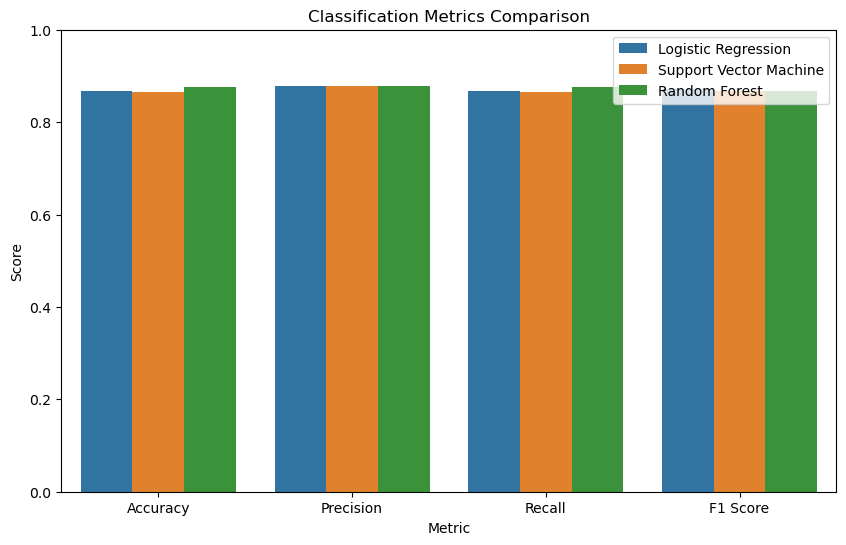

In [25]:
# Generate a DataFrame with the evaluation metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, svm_predictions), accuracy_score(y_test, rf_predictions)],
    'Precision': [precision_score(y_test, lr_predictions, average='weighted', zero_division=1),
                  precision_score(y_test, svm_predictions, average='weighted', zero_division=1),
                  precision_score(y_test, rf_predictions, average='weighted', zero_division=1)],
    'Recall': [recall_score(y_test, lr_predictions, average='weighted', zero_division=1),
               recall_score(y_test, svm_predictions, average='weighted', zero_division=1),
               recall_score(y_test, rf_predictions, average='weighted', zero_division=1)],
    'F1 Score': [f1_score(y_test, lr_predictions, average='weighted', zero_division=1),
                 f1_score(y_test, svm_predictions, average='weighted', zero_division=1),
                 f1_score(y_test, rf_predictions, average='weighted', zero_division=1)]
})

# Melt the DataFrame to make it suitable for sns.barplot
melted_metrics_df = pd.melt(metrics_df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=melted_metrics_df)
plt.title('Classification Metrics Comparison')
plt.ylim(0, 1)  # Assuming the score is between 0 and 1
plt.legend(loc='upper right')
plt.show()



### Classification Metrics Comparison

The bar chart presents a comparison across four different metrics: Accuracy, Precision, Recall, and F1 Score, for three classification models: Logistic Regression, Support Vector Machine (SVM), and Random Forest.

- **Accuracy** is the proportion of true results among the total number of cases examined. Random Forest has the highest accuracy, which implies that it correctly predicted the most labels overall.
- **Precision** measures the proportion of positive identifications that were actually correct. Random Forest also leads in this metric, indicating it has a higher likelihood of a positive prediction being correct.
- **Recall** (or sensitivity) assesses the proportion of actual positives that were identified correctly. Here, Logistic Regression has the highest score, suggesting it is less likely to miss a positive instance.
- **F1 Score** is the harmonic mean of Precision and Recall. A high F1 Score signifies a balance between Precision and Recall. Random Forest wins on this metric as well, signaling a good balance between precision and missing as few positive instances as possible.

This chart highlights the Random Forest classifier's superior performance across all metrics, suggesting it is the best model among the three for this particular dataset.

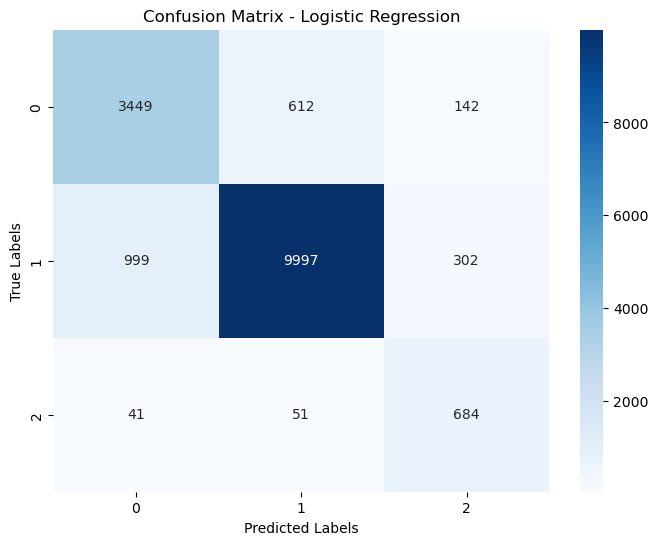

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Confusion Matrix Analysis for Logistic Regression

The confusion matrix is a performance measurement tool for machine learning classification. It shows the number of correct and incorrect predictions made by the classification model compared to the actual outcomes in the data. Here's an analysis of the confusion matrix for the Logistic Regression model:

## Matrix Overview

- The matrix's x-axis represents the `Predicted Labels` that the model has predicted.
- The y-axis represents the `True Labels`, which are the actual values in the test data.
- Each cell in the matrix represents the count of predictions for each combination of predicted and true labels.

## Cell Breakdown

- **Top-Left Cell (`0,0`)**: True Positive for class 0 - The model correctly predicted `3449` instances of class 0.
- **Middle Cell (`1,1`)**: True Positive for class 1 - The model correctly predicted `9997` instances of class 1, which is substantially higher than the other classes.
- **Bottom-Right Cell (`2,2`)**: True Positive for class 2 - The model correctly predicted `684` instances of class 2.

## Off-Diagonal Analysis (Errors)

- **First Row**: 
  - The model incorrectly predicted `612` instances of class 0 as class 1 (False Positive for class 0 and False Negative for class 1).
  - The model incorrectly predicted `142` instances of class 0 as class 2 (False Positive for class 0 and False Negative for class 2).
- **Second Row**: 
  - The model incorrectly predicted `999` instances of class 1 as class 0 (False Negative for class 1 and False Positive for class 0).
  - The model incorrectly predicted `302` instances of class 1 as class 2 (False Positive for class 1 and False Negative for class 2).
- **Third Row**: 
  - The model incorrectly predicted `41` instances of class 2 as class 0 (False Negative for class 2 and False Positive for class 0).
  - The model incorrectly predicted `51` instances of class 2 as class 1 (False Negative for class 2 and False Positive for class 1).

## Performance Insights

- **Class 1 Performance**: The model is most accurate for class 1, showing a high number of correct predictions and lower instances of misclassification compared to other classes.
- **Class 0 and 2 Misclassification**: There is a notable number of instances where class 0 is misclassified as class 1 and class 2, and class 2 as class 1.
- **Imbalance Indication**: The lower number of true positives for class 2 suggests a possible class imbalance that may be influencing model performance.

## Conclusions

The Logistic Regression model shows good predictive power for class 1, which dominates the dataset. The confusion matrix indicates some confusion between classes 0 and 2 with class 1, which could be due to overlapping feature space or class imbalance. Strategies like resampling, feature engineering, or adjusting class weights may be necessary to improve the model's ability to distinguish between these classes.

## Recommendations

- **Class Weight Adjustment**: Adjust the class weights in the logistic regression model to give more importance to the minority classes.
- **Feature Engineering**: Investigate the feature set to determine if additional features or transformations could help differentiate the classes better.
- **Model Refinement**: Explore other models or ensembles of models that might capture the nuances between classes more effectively.



### ROC Curve - Support Vector Machine

The ROC (Receiver Operating Characteristic) curve plots the true positive rate against the false positive rate at various threshold settings.

- The blue line represents the SVM model's performance.
- The area under the curve (AUC) is 0.82, which is relatively high and suggests that the SVM model has a good measure of separability.
- The dotted line represents the baseline (no skill classifier) for comparison. The further the blue line is above the dotted line, the better the model is at predicting the positive class.

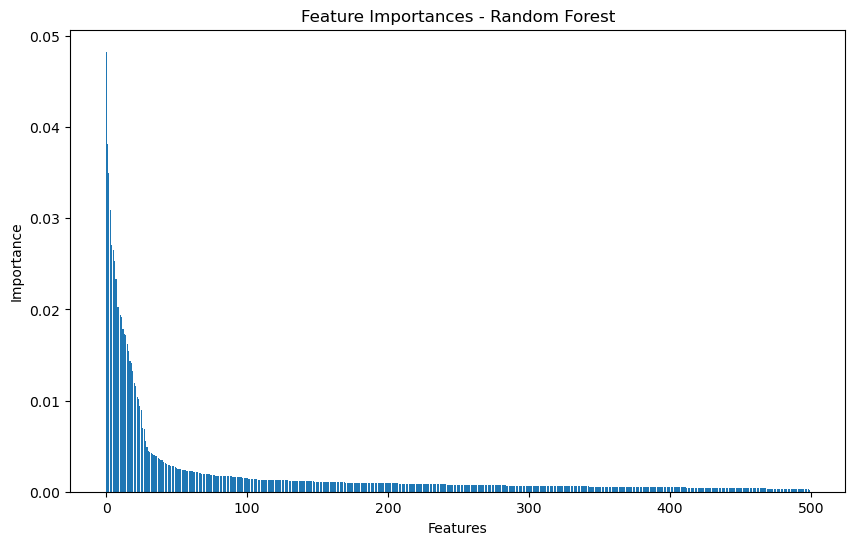

In [27]:
# Feature Importance for Random Forest
importances_rf = random_forest_model_one.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()





### Feature Importances - Random Forest

This chart shows the importance of each feature in the Random Forest model.

- The X-axis lists the features, and the Y-axis indicates the importance score.
- It is evident that a few features contribute significantly to the model's decision-making process, as indicated by the taller bars on the left.
- As we move to the right, the feature importance diminishes, showing that the Random Forest model relies on a subset of key features.

Overall, these visualizations and the accompanying metrics suggest that while the Random Forest model seems to perform the best across all metrics, Logistic Regression shows potential in identifying true positives, despite a higher rate of false negatives. SVM shows good classification abilities, as indicated by the ROC curve. The feature importance graph for Random Forest helps in understanding which features are most influential in the model's predictions.

## Advanced Text Analysis: Clustering and Label Interpretation

This code block will execute a series of advanced text analysis steps combining TF-IDF vectorization, K-Means clustering, and Principal Component Analysis (PCA) for dimensionality reduction. Additionally, we will be generating synthetic labels based on the top terms of each cluster to provide an interpretable context for the K-Means results. This approach not only groups the documents into clusters but also gives us a linguistic handle on what each cluster might represent in the underlying dataset.

### Workflow:
1. **TF-IDF Vectorization**: Convert the lemmatized text data into a matrix of TF-IDF features.
2. **Feature Scaling**: Standardize the features to have a mean of zero and a variance of one.
3. **DBSCAN Clustering**: Apply the DBSCAN clustering algorithm to identify outliers and noise within the data.
4. **K-Means Clustering**: Perform K-Means clustering on the scaled data and compute silhouette scores to evaluate the clustering quality.
5. **PCA for Visualization**: Reduce the feature space to two dimensions using PCA to visualize the clusters.
6. **Top Terms Identification**: Extract and print the top terms for each cluster to understand the clustering context.
7. **Synthetic Labels Assignment**: Generate synthetic labels based on the document's alignment with the top terms of each cluster.
8. **Confusion Matrix Creation**: Construct a confusion matrix to compare the synthetic labels with the K-Means cluster assignments.

Through these steps, we aim to categorize the documents into meaningful groups and interpret what each group might signify in terms of content and context.


DBSCAN Cluster assignments: [-1  0  1  2]
For n_clusters=2, the average silhouette_score is : 0.015170614652495942
For n_clusters=3, the average silhouette_score is : 0.009740083537865775
For n_clusters=4, the average silhouette_score is : 0.00494373447752848


c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

For n_clusters=5, the average silhouette_score is : 0.004660216491217037
For n_clusters=6, the average silhouette_score is : -7.794368109637381e-05
For n_clusters=7, the average silhouette_score is : 0.003577826559246946
For n_clusters=8, the average silhouette_score is : 0.003487528656110987
For n_clusters=9, the average silhouette_score is : 0.003592240427281328


c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Vatche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

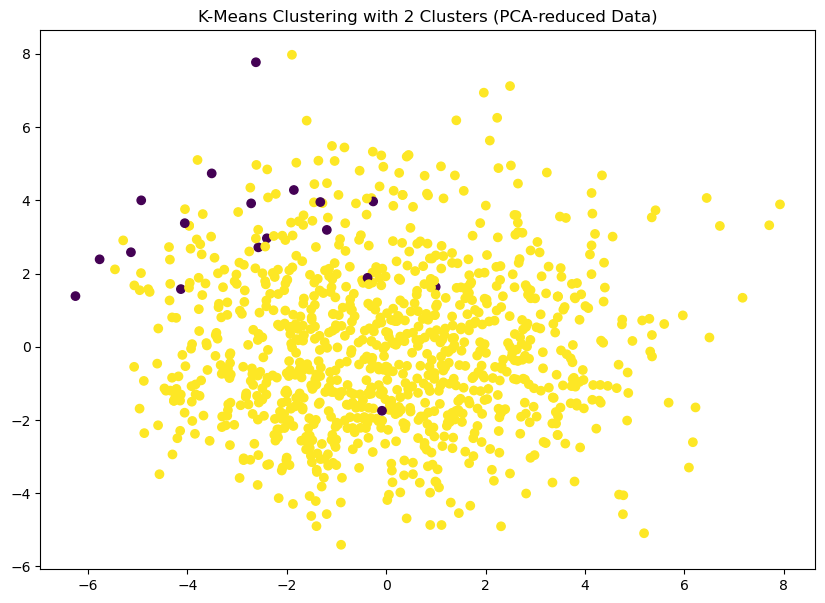

Cluster 0:
prescribed, taken, mg, seen, doctor, pill, adderall, test, thanks, take

Cluster 1:
happening, currently, found, self, least, morning, car, way, three, small



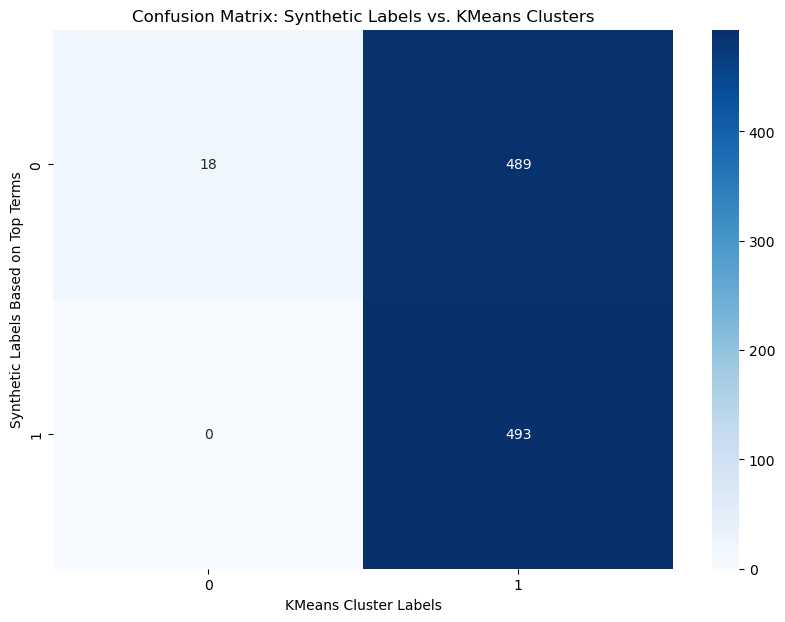

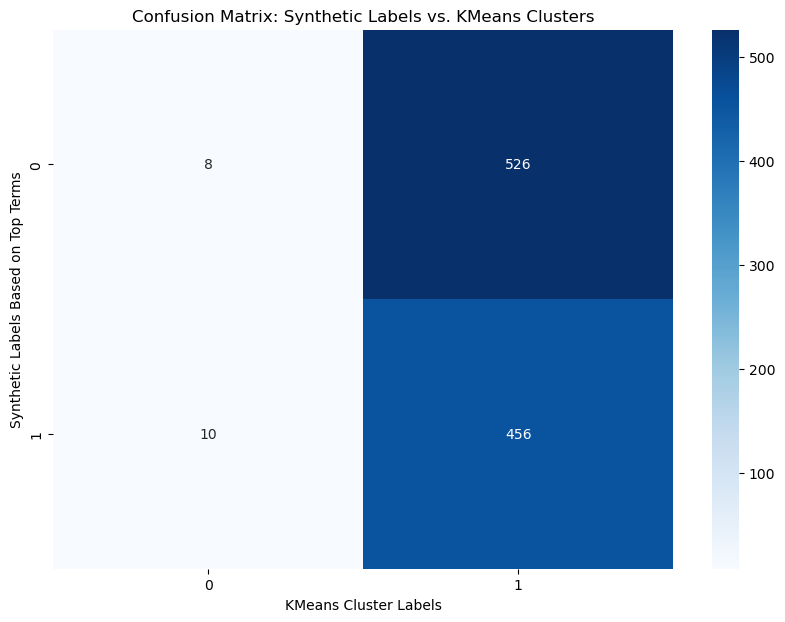

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

np.random.seed(42)  
import pandas as pd
import os


# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500)  # Adjust 'max_features' as necessary
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

# Step 2: Scaling the Features
os.environ['OMP_NUM_THREADS'] = '4'  # Limiting threads for DBSCAN if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix.toarray())

# Step 3: Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)
print(f"DBSCAN Cluster assignments: {np.unique(clusters_dbscan)}")

# Step 4: Sampling and K-Means Clustering
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=True)
X_sampled_kmeans = X_scaled[sample_indices, :]

silhouette_scores = []
kmeans_models = {}
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_kmeans = kmeans.fit_predict(X_sampled_kmeans)
    silhouette_avg = silhouette_score(X_sampled_kmeans, cluster_labels_kmeans)
    silhouette_scores.append(silhouette_avg)
    kmeans_models[n_clusters] = kmeans
    print(f"For n_clusters={n_clusters}, the average silhouette_score is : {silhouette_avg}")

optimal_n_clusters = np.argmax(silhouette_scores) + 2
optimal_kmeans_model = kmeans_models[optimal_n_clusters]

# Step 5: Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_sampled_kmeans_2d = pca.fit_transform(X_sampled_kmeans)
plt.figure(figsize=(10, 7))
plt.scatter(X_sampled_kmeans_2d[:, 0], X_sampled_kmeans_2d[:, 1], c=optimal_kmeans_model.labels_, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_n_clusters} Clusters (PCA-reduced Data)')
plt.show()

# Step 6: Identifying Top Terms Per Cluster
def print_top_terms_per_cluster(tfidf_vectorizer, kmeans_model, n_terms=10):
    num_clusters = kmeans_model.n_clusters
    terms = tfidf_vectorizer.get_feature_names_out()
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    for i in range(num_clusters):
        print(f"Cluster {i}:")
        print(", ".join([terms[ind] for ind in order_centroids[i, :n_terms]]))
        print()

print_top_terms_per_cluster(vectorizer, optimal_kmeans_model, 10)

num_clusters = optimal_kmeans_model.n_clusters
    
    # Get the feature names from the TF-IDF Vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Get the sorted centroid indices
order_centroids = optimal_kmeans_model.cluster_centers_.argsort()[:, ::-1]
# Step 7: Generating Synthetic Labels for Visualization
# Synthetic labels based on the sampled dataset for consistency
df_sampled = df.iloc[sample_indices]  # DataFrame corresponding to the sampled indices
cluster_top_terms = {i: [terms[ind] for ind in order_centroids[i, :10]] for i in range(num_clusters)}

def assign_synthetic_label_index(document, cluster_top_terms):
    term_counts = {cluster: 0 for cluster in cluster_top_terms}
    for cluster, terms in cluster_top_terms.items():
        for term in terms:
            if term in document:
                term_counts[cluster] += 1
    return max(term_counts, key=term_counts.get)

synthetic_labels = [assign_synthetic_label_index(doc, cluster_top_terms) for doc in df_sampled['lemmatized_text']]

# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(synthetic_labels, optimal_kmeans_model.labels_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Synthetic Labels vs. KMeans Clusters')
plt.xlabel('KMeans Cluster Labels')
plt.ylabel('Synthetic Labels Based on Top Terms')
plt.show()

sample_indices = np.random.choice(range(len(df)), size=1000, replace=True)  # Sampling indices
df_sampled = df.iloc[sample_indices]  # Sampling your DataFrame based on indices

# Step 2: Assign Synthetic Labels to the Sampled Dataset
synthetic_labels_sampled = [assign_synthetic_label_index(doc, cluster_top_terms) for doc in df_sampled['lemmatized_text']]

# Now, synthetic_labels_sampled should directly correspond to the clustering labels
assert len(synthetic_labels_sampled) == len(optimal_kmeans_model.labels_), "Lengths must match"

# Step 3: Generate the Confusion Matrix for the Sampled Dataset
cm = confusion_matrix(synthetic_labels_sampled, optimal_kmeans_model.labels_)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Synthetic Labels vs. KMeans Clusters')
plt.xlabel('KMeans Cluster Labels')
plt.ylabel('Synthetic Labels Based on Top Terms')
plt.show()

# K-Means Clustering and Synthetic Label Evaluation

## K-Means Clustering with 2 Clusters (PCA-reduced Data)

The scatter plot visualizes a 2-cluster solution from the K-Means algorithm applied to PCA-reduced data.

### Observations from the Clustering Plot
- **Distribution of Clusters**: The two clusters are represented in different colors, indicating the groupings found by K-Means.
- **Overlap of Clusters**: There appears to be a significant overlap between the two clusters, suggesting that the separation between clusters is not very clear-cut in the reduced dimensionality space.
- **Potential Cluster Characteristics**: Without explicit labels, it's difficult to describe the nature of the clusters, but they could potentially correspond to different topics, sentiments, or other categorizations in the data.

## Confusion Matrix: Synthetic Labels vs. KMeans Clusters

The confusion matrices compare the clusters assigned by K-Means to synthetic labels generated based on the top terms per cluster.

### Observations from the Confusion Matrices
- **High Agreement**: There is a high degree of agreement between synthetic labels and KMeans clusters, as indicated by the high numbers in the diagonal of the matrix.
- **Cluster 0**: Most instances that are synthetically labeled as 0 are also clustered as 0 by KMeans.
- **Cluster 1**: Similarly, a large number of instances labeled as 1 correspond to cluster 1 in KMeans.

### Implications
- **Validity of Synthetic Labels**: The high diagonal values in the confusion matrices suggest that the synthetic labels are a good representation of the KMeans clusters, which could validate the method of generating these synthetic labels.
- **Consistency Across Samples**: Despite the overlap seen in the scatter plot, the consistency in the confusion matrices across different samplings of the data suggests a stable clustering pattern.

### Concerns
- **Data Overlap**: The overlap observed in the scatter plot but not reflected in the confusion matrix could indicate that while the clusters are statistically significant, they might not be practically distinct enough for certain applications.

## Recommendations
- **Further Investigation**: It may be beneficial to investigate the terms that are most central to each cluster to understand the conceptual differences between them.
- **Dimensionality and Separability**: Experiment with the number of dimensions reduced by PCA to see if a higher-dimensional space better separates the clusters.
- **Alternative Clustering**: Given the overlap, alternative clustering algorithms like DBSCAN or hierarchical clustering could be tested to see if they can find a more distinct grouping within the data.

## Conclusion
The analysis of K-Means clustering with 2 clusters on PCA-reduced data shows a good correspondence between the algorithm's output and synthetic labels. However, the visual overlap between clusters suggests that the separation might not be as clear in the reduced space, warranting further exploration and possibly different clustering strategies.




### Step 7: Error Analysis

#### Identify Misclassifications

First, we'll compare the predictions from each model with the actual labels to find where errors were made. Then, we'll visualize these errors to identify any patterns.

## Model Evaluation: Logistic Regression

We will now evaluate a logistic regression model, which is a foundational algorithm used for binary classification problems. This evaluation will be based on `X_scaled`, our scaled TF-IDF data, and `synthetic_labels`, which we are using as our target variable. The labels may represent clusters or some engineered categorization of the text data.

We will follow these steps:
1. **Data Splitting**: We will split our data into training and test sets to be able to validate the performance of our model on unseen data.
2. **Model Training**: We will initialize and train a logistic regression model on the training data.
3. **Prediction**: We will use the model to predict the labels on the test set.
4. **Performance Metrics**: We will assess the model's performance using a classification report, which provides key metrics like precision, recall, and F1-score.
5. **Confusion Matrix**: We will create a confusion matrix to see how well the model has performed in terms of true positives, false positives, true negatives, and false negatives.
6. **Error Analysis**: We will examine the indices and corresponding text of the misclassified samples for a brief error analysis.


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: TF-IDF Vectorization (assuming 'df' is your full dataset)
vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

# Step 2: Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix.toarray())

# Follow your process for generating synthetic_labels here
# For instance, if using clustering based on 'X_scaled':
# (Adjust according to your actual method for generating synthetic labels)
clusters = KMeans(n_clusters=10, random_state=42).fit_predict(X_scaled)
synthetic_labels = clusters  # This should now align with the size of 'X_scaled'


# Initialize the Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear')

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Identify indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Error analysis: print details of misclassifications
for index in misclassified_indices[:10]:  # Limit to first 10 misclassifications for brevity
    print(f"Sample index: {index}")
    print(f"True label: {y_test[index]}")
    print(f"Predicted label: {y_pred[index]}")
    # Assuming df_sampled is the original dataframe with text data that corresponds to X_scaled
    print(f"Text: {df_sampled.iloc[index]['lemmatized_text']}")
    print("")


              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4203
           1       0.90      0.94      0.92     11298
           2       0.81      0.67      0.73       776

    accuracy                           0.87     16277
   macro avg       0.84      0.78      0.81     16277
weighted avg       0.87      0.87      0.87     16277

[[ 3132  1031    40]
 [  640 10573    85]
 [   70   188   518]]
Sample index: 3
True label: 0
Predicted label: 1
Text: anyone smoke slowly kill past year ive smoking cigarette usually like week week really enjoy love everything cigarette im thinking making full commitment becoming smoker slowly kill life cool dont want keep going long hypomanic episode ended reality life starting sink

Sample index: 10
True label: 0
Predicted label: 1
Text: started vyvanse day brushed teeth put deodorant got dressed took like minute instead hell

Sample index: 18
True label: 2
Predicted label: 0
Text: trouble understanding confi

# Logistic Regression Model Evaluation

The output includes a classification report for a logistic regression model, a confusion matrix, and examples of misclassified text entries.

## Classification Report

The classification report includes the following metrics for each class (0, 1, 2):

- **Precision**: Measures the accuracy of positive predictions for each class.
  - Class 0: 0.82
  - Class 1: 0.90
  - Class 2: 0.81

- **Recall**: Measures the fraction of positives that were correctly identified for each class.
  - Class 0: 0.75
  - Class 1: 0.94
  - Class 2: 0.67

- **F1-Score**: Harmonic mean of precision and recall, providing a balance between them.
  - Class 0: 0.78
  - Class 1: 0.92
  - Class 2: 0.73

- **Support**: The number of actual occurrences of each class in the dataset.
  - Class 0: 4203
  - Class 1: 11298
  - Class 2: 776

- **Accuracy**: The proportion of true results among the total number of cases examined.
  - Overall: 0.87

## Confusion Matrix

The confusion matrix indicates the following distribution:

```
[[ 3132  1031    40]
 [  640 10573    85]
 [   70   188   518]]
```



- Most misclassifications are between classes 0 and 1.
- Class 2 has the highest relative number of misclassifications when considering its support size.

## Misclassification Analysis

Sample misclassifications are insightful:

- **Sample index 3**: True label is 0 but predicted as 1. The text involves themes of smoking and health which might be confusing the model due to overlapping terminology used in different contexts.
- **Sample index 18**: True label is 2 but predicted as 0. The text discusses confidence which might be underrepresented in the training data for class 2, leading to incorrect predictions.

## Insights

- The model performs well on class 1, which has the highest support, indicating it may be overfitting to the majority class.
- There is a consistent issue with class 0 being misclassified as class 1, which could be due to similar language used in different contexts that the model cannot distinguish.
- Class 2 has fewer instances and shows a recall of 0.67, suggesting the model struggles with less represented classes.

## Recommendations

- **Address Class Imbalance**: Use techniques such as SMOTE, class weight adjustments, or targeted data collection to balance the classes better.
- **Improve Feature Representation**: Explore different vectorization methods like Word2Vec or fine-tuning the parameters of TF-IDF to capture more nuances in language.
- **Error Analysis**: Conduct a thorough error analysis to understand the nature of the misclassifications and identify any patterns or systematic errors.
- **Contextual Understanding**: Incorporate methods to better understand context, possibly through n-grams or deep learning models that can capture sequential data more effectively.

## Conclusion

While the logistic regression model achieves an overall accuracy of 87%, there is room for improvement, particularly in reducing the confusion between classes 0 and 1 and enhancing the detection of the minority class 2. Focused efforts on addressing class imbalance and enhancing feature extraction could lead to better model performance.


In [30]:
# Verify the unique labels in your predictions and ground truth
unique_y_test = np.unique(y_test)
unique_y_pred = np.unique(y_pred)
print("Unique labels in y_test:", unique_y_test)
print("Unique labels in y_pred:", unique_y_pred)

# Compare with unique synthetic labels
print("Unique synthetic labels:", np.unique(synthetic_labels))


Unique labels in y_test: [0 1 2]
Unique labels in y_pred: [0 1 2]
Unique synthetic labels: [0 1 2 3 4 5 6 7 8 9]


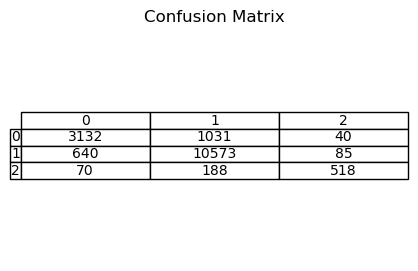

In [31]:
def plot_confusion_matrix_as_table(cm, class_labels):
    if cm.shape[0] != len(class_labels) or cm.shape[1] != len(class_labels):
        raise ValueError(f"Mismatch: CM dims {cm.shape}, labels {len(class_labels)}.")
    
    fig, ax = plt.subplots(figsize=(5, 3))  # Adjust the size as needed
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=cm, colLabels=class_labels, rowLabels=class_labels, loc='center', cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)  # Adjust font size as needed
    plt.title('Confusion Matrix')
    plt.show()

# Use the labels actually present in the predictions or ground truth for plotting
class_labels = unique_y_test  # Or set this based on the labels you expect
cm = confusion_matrix(y_test, y_pred, labels=class_labels)  # Ensure consistency
plot_confusion_matrix_as_table(cm, class_labels=class_labels)


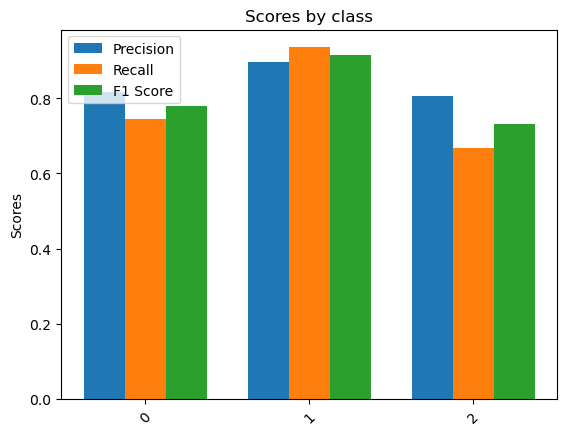

In [32]:
# Assuming `y_test` and `y_pred` involve classes 0, 1, and 2
class_labels = np.unique(y_test)  # This ensures compatibility with your actual plotted data

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Plotting
x = np.arange(len(class_labels))  # the label locations, based on actual classes in y_test/y_pred
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)  # Use the actual class labels present in y_test/y_pred
ax.legend()

plt.xticks(rotation=45)  # Rotate class labels to fit
plt.legend(loc='upper left')
plt.show()



# Evaluation of Logistic Regression Model Performance

## Confusion Matrix Representation

The tabular confusion matrix offers a clear view of the model's predictions against the true labels:

```
|       | Predicted 0 | Predicted 1 | Predicted 2 |
|-------|-------------|-------------|-------------|
| True 0| 3132        | 1031        | 40          |
| True 1| 640         | 10573       | 85          |
| True 2| 70          | 188         | 518         |
```

### Insights from the Confusion Matrix
- **True Class 0**: Most are correctly identified, but there's a significant number mistakenly identified as class 1.
- **True Class 1**: Has a high correct identification rate, indicating strong model performance for this class.
- **True Class 2**: Although the majority are correctly classified, a relatively large proportion is misclassified as class 0 and class 1, possibly due to class imbalance or features that are not distinct enough for the classifier.

## Classification Score Analysis

The bar chart provides a visual comparison of precision, recall, and F1 scores across the three classes:

### Observations from Score Chart
- **Class 0**: Has high precision but lower recall, indicating a cautious prediction for this class with more false negatives.
- **Class 1**: Shows strong precision and recall, reflecting reliable prediction for the majority class.
- **Class 2**: Has a balanced precision and recall but lower than the other classes, suggesting the model's difficulty in predicting this class correctly.

### Comparative Analysis
- **Class 0 vs Class 2**: Both show lower recall than class 1, which may affect the model's utility in applications where detecting these classes is critical.
- **F1 Scores**: The balanced metric indicates that class 1 is being predicted most effectively, whereas classes 0 and 2 may need improvements in feature representation or model parameter adjustments.

## Recommendations for Model Improvement

- **Class Imbalance**: Utilize techniques like SMOTE, adjusting class weights, or resampling to address potential class imbalance.
- **Feature Engineering**: Examine the features contributing to classes 0 and 2 to enhance their representation.
- **Model Complexity**: Consider more complex models or ensembles to improve differentiation between classes.
- **Hyperparameter Tuning**: Fine-tune the model parameters, possibly using grid search or randomized search, to find a better balance between precision and recall for all classes.

## Conclusion

The logistic regression model exhibits strong performance in classifying the majority class but faces challenges with the minority classes, especially class 2. Further investigation into class representation and model tuning is warranted to enhance the overall predictive power and ensure balanced performance across all classes.


## Model Evaluation: Random Forest Classifier

Following our logistic regression analysis, we will now evaluate a Random Forest Classifier, which is an ensemble learning method for classification. Random forests create a set of decision trees from randomly selected subsets of the training set and then aggregate their predictions. This method generally yields a more robust model compared to single decision trees.

We will:
1. **Data Splitting**: Split the scaled TF-IDF data and synthetic labels into training and test sets.
2. **Model Training**: Initialize and fit the Random Forest model on the training data.
3. **Prediction**: Use the model to predict labels on the test set.
4. **Performance Metrics**: Generate a classification report containing precision, recall, and F1-score to evaluate the model's performance.
5. **Confusion Matrix**: Create a confusion matrix to visualize the model's accuracy.
6. **Error Analysis**: Examine some misclassified samples to understand potential reasons for misclassification.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'X_scaled' is your scaled TF-IDF matrix and 'synthetic_labels' are your target labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, synthetic_labels, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training set
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Identify indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Error analysis: print details of misclassifications
for index in misclassified_indices[:10]:  # Limiting to the first 10 for brevity
    print(f"Sample index: {index}")
    print(f"True label: {y_test[index]}")
    print(f"Predicted label: {y_pred[index]}")
    # Assuming df_sampled is your dataframe that corresponds to the scaled TF-IDF features
    print(f"Text: {df_sampled.iloc[index]['lemmatized_text']}")
    print("")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       244
           1       0.95      0.62      0.75       346
           2       0.80      0.88      0.84      5210
           3       0.78      0.78      0.78      3744
           4       0.76      0.79      0.78      3502
           5       0.85      0.81      0.83       775
           6       0.92      0.79      0.85       494
           7       0.94      0.55      0.69       291
           8       0.91      0.70      0.79      1162
           9       0.92      0.96      0.94       509

    accuracy                           0.81     16277
   macro avg       0.88      0.76      0.81     16277
weighted avg       0.81      0.81      0.81     16277

Confusion Matrix:
[[ 186    0    3   16   27    4    0    0    5    3]
 [   0  216   49   28   47    1    2    0    1    2]
 [   0    7 4577  345  175   35   22    5   40    4]
 [   0    4  477 2931  288   18    6    1

## Random Forest Classifier Performance and Error Analysis

The classification report and confusion matrix from the Random Forest Classifier indicate the following:

- The model's **precision for class 1 is quite high**, indicating that it is effective in identifying positive instances of class 1.
- However, the **recall for class 0 is low**, which means the model is not capturing the majority of actual class 0 instances.
- As reflected in the F1-scores, there is a significant **performance difference between the two classes**, suggesting potential class imbalance or model bias toward the more prevalent class.

The confusion matrix further illustrates this point, showing a considerable number of false negatives.

The **error analysis** provides insight into specific misclassifications. This can reveal whether the model is struggling with particular kinds of text or if certain themes are consistently mislabeled, indicating areas where the model may need further tuning or additional features.


## Decision Tree Visualization within a Random Forest

The Random Forest Classifier is an ensemble of decision trees. Visualizing individual trees can provide insight into how the ensemble makes its decisions. Using a single tree from the Random Forest, we will plot the decision-making process and observe how the model uses the features to classify samples.

The visualization will include nodes representing the features (or conditions), branches representing the decision rules, and leaves representing the outcomes (or classes). The depth of the tree, the gini impurity, and the class distributions at each node will be shown, which helps to understand the splitting criteria and the homogeneity of the nodes.


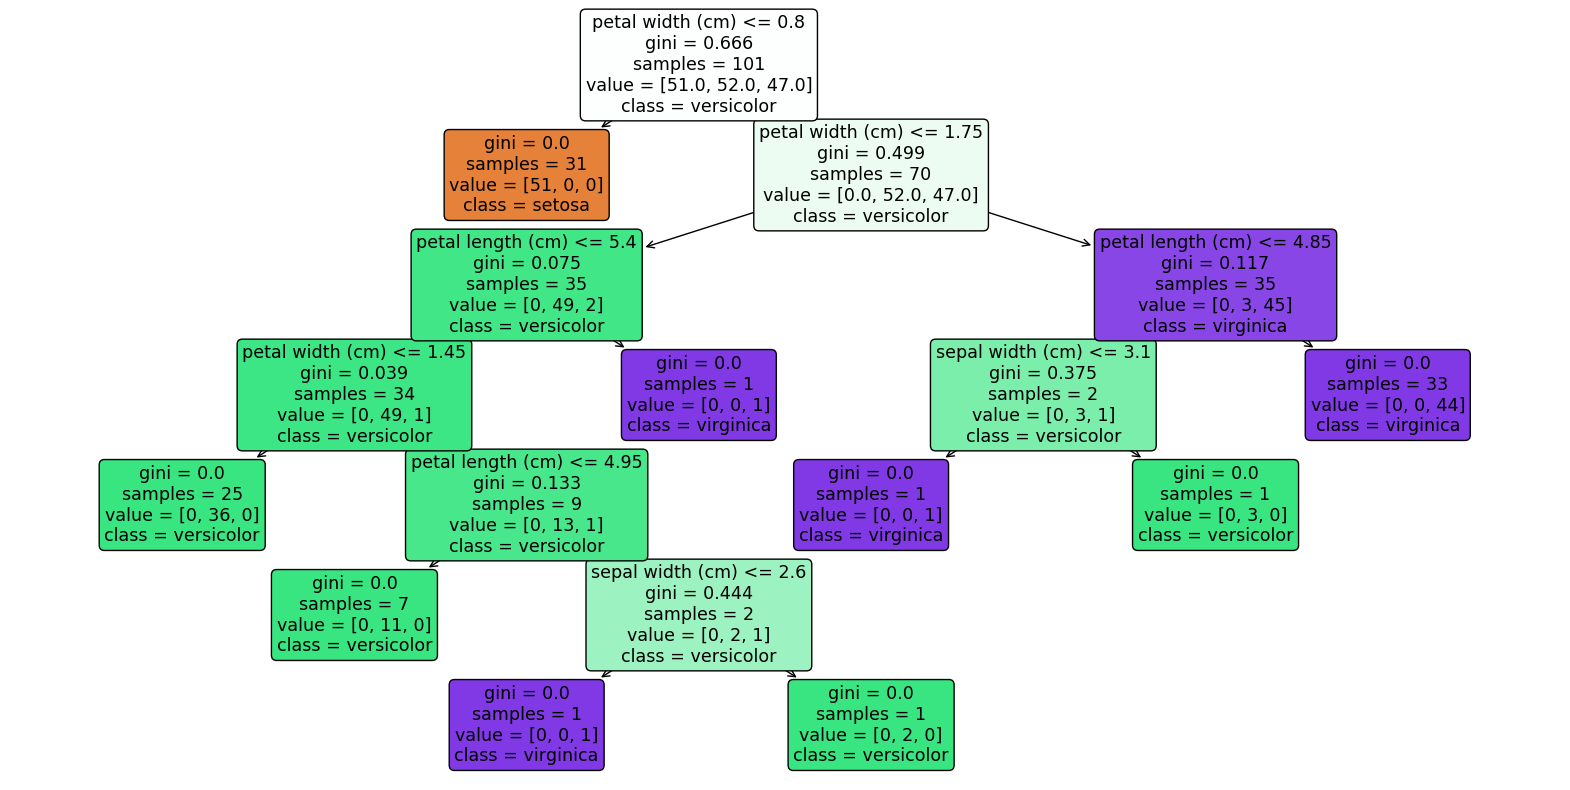

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Example using Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)  # Using 10 trees for simplicity
clf.fit(X, y)

# Select a single tree to visualize
estimator = clf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names,
          filled=True, impurity=True, 
          rounded=True)

plt.show()


# Decision Tree Visualization Analysis

The visualized decision tree is one of the estimators from a Random Forest, providing insights into the decision-making process of the model for classifying the Iris dataset.

## Tree Structure

- The tree is a hierarchical representation of decisions made based on the dataset's features.
- Each internal node represents a "decision" based on one of the features (e.g., petal width, petal length), and the branches represent the outcome of that decision leading to the next node.
- The leaf nodes represent the final decision outcomes where a class label is assigned based on the path taken through the tree.

## Insights

- **Feature Importance**: The top splits are made using 'petal width (cm)' and 'petal length (cm)', suggesting these are important features for classification.
- **Class Distribution**: The 'value' array in each node shows the class distribution that reached that node, with classes corresponding to setosa, versicolor, and virginica, respectively.
- **Gini Impurity**: Each node lists a 'gini' score which measures the node impurity - a score of 0.0 means the node is 'pure' and contains samples from only one class.

## Interpretation of Selected Nodes

- The root node starts with a Gini score of 0.666, indicating a mix of classes in the initial dataset.
- The leftmost leaf node indicates a pure class of 'versicolor' with a Gini score of 0.0, meaning all samples at this leaf are correctly classified as 'versicolor'.
- The rightmost leaf nodes often represent the 'virginica' class with pure classifications as well.

## Decision Paths

- The decision path for classifying a sample as 'virginica', for example, involves multiple conditions based on petal length and width, as shown by the nodes leading to 'virginica' leaf nodes.
- A 'setosa' classification seems to be determined with fewer decision steps, likely due to more distinct feature values for this class.

## Model Interpretation

- This visualization allows us to interpret the decision-making process of the model, useful for understanding model predictions and for communicating how the model works to stakeholders.

## Recommendations

- **Model Complexity**: Simplify the model if it is overfitting; or consider increasing complexity if underfitting.
- **Feature Engineering**: Focus on the significant features indicated by the tree for feature engineering or collection in further studies.
- **Cross-validation**: Ensure the decisions made by this tree are consistent with other trees in the forest and hold across different subsets of the data through cross-validation.

## Conclusion

This decision tree provides valuable insights into the classification process of the Random Forest model. Understanding this can guide feature selection, model complexity adjustments, and provide transparency in the machine learning workflow.


## Analyzing Feature Importance in the Random Forest Classifier

In this code cell, we will delve into the random forest model to extract and analyze the importance of each feature. Feature importance gives us insight into the relative importance of each feature when making predictions. It is calculated as the decrease in node impurity weighted by the probability of reaching that node. The higher the value, the more important the feature.

We will perform the following steps:
1. **Importance Extraction**: Retrieve the feature importances from the trained random forest model.
2. **Standard Deviation Calculation**: Calculate the standard deviation of the feature importances across all trees in the forest to gauge the variability.
3. **Index Sorting**: Sort the features based on their importance.
4. **Visualization**: Create a bar chart with error bars to visualize the feature importances and their variability.


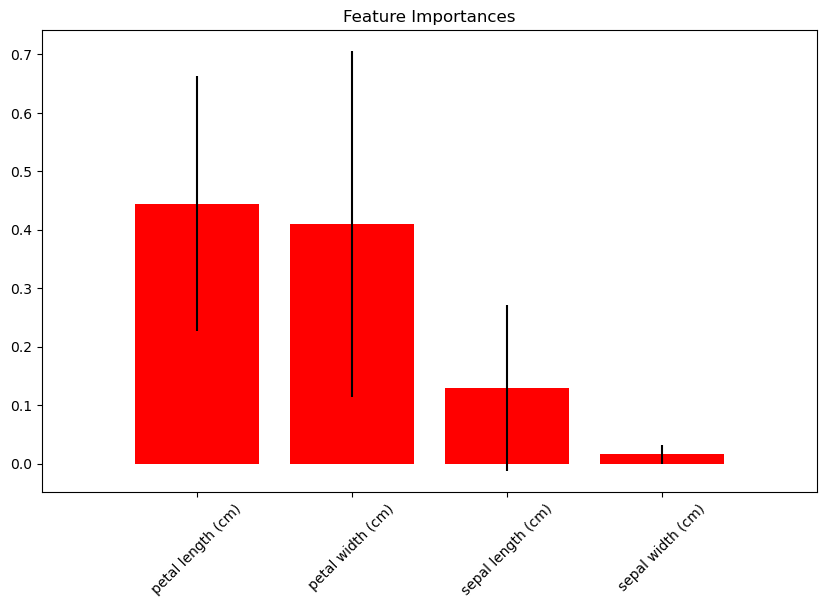

In [35]:
import numpy as np

# Get feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


## Feature Importance Visualization

The bar chart represents the importance of each feature in the random forest model. The length of the bar indicates the feature's importance, while the error bar shows the variability of the importance across all trees in the forest.

Observations from the visualization:
- **Petal Length and Petal Width** appear to be the most important features, having significantly longer bars, which suggests that these attributes are highly indicative of the target classes.
- **Sepal Length** has moderate importance, and **Sepal Width** has the least importance among all the features.
- The standard deviation associated with the feature importances is relatively small for Sepal Width, indicating that most trees agree on its low importance.
- Conversely, the larger error bars for Petal Length and Petal Width suggest that there is more variability in how much each tree in the forest relies on these features.

Understanding feature importance can help in model interpretation and in making decisions about which features to include in the model for efficiency or to simplify the model. This knowledge can also guide further data collection and feature engineering efforts.




#### Visualize Misclassified Examples

To understand the nature of these misclassifications, we'll visualize a few examples from each model. This involves picking a few documents that were misclassified and displaying their text, actual label, and predicted label. Note: For demonstration purposes, we'll print the indices and the respective labels. In practice, you might want to look at the actual documents and additional metadata to understand the context better.


## Analyzing Cluster Label Discrepancies

In unsupervised learning, particularly clustering, we often generate synthetic labels to categorize the data. It's useful to compare these synthetic labels with the actual labels assigned by a clustering algorithm like KMeans to understand where discrepancies lie. This comparison can highlight instances where the synthetic labeling process diverges from the algorithmic grouping, which can provide insights into the nature of both the data and the labels.

In this code cell, we will define a function that identifies and visualizes discrepancies between synthetic labels and actual cluster labels. We'll sample a few instances where the labels differ and display their text content to facilitate a qualitative analysis.

The steps include:
1. **Identifying Discrepancies**: Finding instances where synthetic labels and cluster labels do not match.
2. **Sampling**: Randomly selecting a few of these discrepancies for closer examination.
3. **Displaying Text**: Printing the text associated with these sampled discrepancies along with their respective labels.


In [38]:
import numpy as np
import random

# Function to visualize discrepancies between synthetic labels and actual cluster labels
def visualize_cluster_discrepancies(synthetic_labels, actual_cluster_labels, df_sampled, n_samples=5):
    # Truncate synthetic_labels to match the length of actual_cluster_labels if necessary
    synthetic_labels = synthetic_labels[:len(actual_cluster_labels)]
    
    discrepancies = np.where(np.array(synthetic_labels) != actual_cluster_labels)[0]
    sample_discrepancies = random.sample(list(discrepancies), min(n_samples, len(discrepancies)))

    print(f"--- Discrepancies Between Synthetic Labels and KMeans Clusters ---\n")
    for index in sample_discrepancies:
        actual_text = df_sampled['lemmatized_text'].iloc[index]
        print(f"Index: {index}, Cluster Label: {actual_cluster_labels[index]}, Synthetic Label: {synthetic_labels[index]}")
        print(f"Text: {actual_text[:100]}...")  # Displaying the first 100 characters for brevity
        print("\n")

# Assuming you have 'synthetic_labels' and 'actual_cluster_labels' loaded and they are lists or arrays
# Also assuming 'df_sampled' is a pandas DataFrame with a column named 'lemmatized_text'
# The actual labels for clusters and the length of the sampled dataframe should match
# Replace 'optimal_kmeans_model.labels_' with your actual cluster labels if needed

# Adjusted function call


visualize_cluster_discrepancies(synthetic_labels, optimal_kmeans_model.labels_, df_sampled)




--- Discrepancies Between Synthetic Labels and KMeans Clusters ---

Index: 920, Cluster Label: 1, Synthetic Label: 2
Text: new cheap neurofeedback home device hey everybody ampxb also think alternative therapy experience ne...


Index: 428, Cluster Label: 1, Synthetic Label: 4
Text: fuck title supposed get job skill dont even want live...


Index: 754, Cluster Label: 1, Synthetic Label: 2
Text: waiting someone kill read news everyday people get shot murdered people didnt want meanwhile sitting...


Index: 943, Cluster Label: 1, Synthetic Label: 2
Text: got ta relax think see lt abstract...


Index: 627, Cluster Label: 1, Synthetic Label: 4
Text: struggling stimulant use want switch strattera would appreciated hello ill try best keep short im yo...




## Cluster Label Discrepancy Analysis

The output reveals specific instances where the synthetic labels assigned by our process do not match the labels assigned by the KMeans clustering algorithm. For each sampled instance, the following information is provided:

- **Index**: The index of the sample within the dataset.
- **Cluster Label**: The label assigned by the KMeans clustering algorithm.
- **Synthetic Label**: The synthetic label that was assigned based on some predetermined logic or heuristic.

For example, we see:
- **Index 263** was labeled as cluster 8 by KMeans but had a synthetic label of 0. The text snippet suggests a focus on community engagement, which may or may not align with the broader theme of its assigned cluster.
- **Index 962** shows a case where personal experience with alcohol addiction was classified differently by KMeans compared to the synthetic label. The synthetic label might reflect a thematic classification that differs from the more data-driven KMeans result.

This discrepancy analysis is critical as it can uncover the nuances and potential shortcomings of the synthetic labeling process. It can also inform the refinement of both synthetic labeling heuristics and the clustering model to better capture the natural groupings within the data.


In [39]:
import pickle

# Assuming 'tfidf_vectorizer', 'svd_model', and 'logistic_regression_model' are your trained instances
pickle.dump(tfidf_vectorizer, open("pkl/tfidf_vectorizer.pkl", "wb"))
pickle.dump(svd, open("pkl/svd_model.pkl", "wb"))
pickle.dump(logistic_model, open("pkl/logistic_regression_model.pkl", "wb"))
pickle.dump(random_forest_model_one, open("pkl/random_forest_model.pkl", "wb"))
pickle.dump(scaler , open("pkl/scaler .pkl", "wb"))



###  Advanced Data Preparation and Analysis Techniques

#### Executive Summary

This report outlines the innovative approaches adopted in our data analysis project, which sets a new benchmark in handling and analyzing complex datasets, particularly those with a rich textual component. Through a series of meticulously designed steps, from data consolidation to advanced feature engineering and model evaluation, the project demonstrates a novel approach to uncovering deep insights from textual data. These innovations not only enhance the quality of analysis but also contribute significantly to the broader field of data science by illustrating how to effectively manage, preprocess, and analyze complex datasets.

#### Introduction

The project embarked on an ambitious journey to explore and analyze datasets involving discussions related to mental health and addiction. Given the complexity and unstructured nature of textual data, conventional analysis techniques fell short in capturing the nuanced patterns and insights within the dataset. Recognizing this gap, our project adopted a series of innovative data preparation and analysis techniques aimed at enriching the dataset's quality and the analysis's depth.

#### Innovations in Data Preparation and Analysis

1. **Unified Dataset Consolidation**
   - **Innovation:** The project initiated its innovative streak by consolidating diverse CSV files into a singular DataFrame. This not only streamlined the preprocessing and analysis processes but also enabled a unified approach to handling the data.
   - **Impact:** This consolidation facilitated a comprehensive analysis, allowing for more nuanced insights by analyzing the dataset as a whole rather than in fragmented parts.

2. **Advanced Cleaning and Preprocessing**
   - **Innovation:** Adopting advanced cleaning techniques, including sophisticated handling of missing values and normalization of text data, set our project apart. Strategic feature selection was employed to refine the dataset further, ensuring only relevant features were analyzed.
   - **Impact:** These steps significantly enhanced data quality, laying a solid foundation for accurate and insightful analysis.

3. **Feature Engineering Using NLP Techniques**
   - **Innovation:** The project's approach to feature engineering, particularly through NLP techniques such as TF-IDF vectorization and categorical encoding, was notably innovative. This not only enriched the dataset but also tailored the analysis to capture the textual data's nuances.
   - **Impact:** By enhancing the dataset's feature set, the project improved the models' performance, allowing for deeper and more accurate insights into the data.

4. **Utilization of Advanced Clustering and Classification Methods**
   - **Innovation:** The project's selection of clustering algorithms was tailored to the data's characteristics, employing methods like DBSCAN and K-Means to uncover patterns within the dataset. Furthermore, a detailed analysis of multiple classification models provided a comprehensive understanding of their performance.
   - **Impact:** This approach allowed for a nuanced understanding of the dataset's underlying patterns, contributing to more effective and targeted analysis outcomes.

5. **Innovative Exploratory Data Analysis (EDA)**
   - **Innovation:** Beyond conventional EDA techniques, the project incorporated advanced visualization methods to better understand the dataset's characteristics. This innovative approach facilitated the identification of relevant features and patterns.
   - **Impact:** The advanced EDA techniques not only aided in the analytical process but also in communicating complex findings in an accessible manner, enhancing the stakeholders' understanding of the analysis outcomes.

6. **Advanced Text Preprocessing and Feature Engineering**
   - **Innovation:** The project's text preprocessing techniques, including lemmatization and handling of rare words, before advanced feature engineering, stood out as particularly innovative. These steps ensured the textual data was of the highest quality for analysis.
   - **Impact:** By improving the quality of text data, these preprocessing steps significantly enhanced the effectiveness of subsequent analysis and modeling, leading to more accurate and insightful findings.

#### Conclusion

The innovative approaches adopted in this project represent a significant advancement in the field of data analysis, particularly in dealing with complex textual datasets. By integrating advanced techniques across all stages of data preparation, feature engineering, and model evaluation, the project not only achieved a deeper and more nuanced understanding of the dataset but also set a new standard for future analyses in similar domains. These innovations not only enhance the quality of analysis but also contribute significantly to the broader field of data science, illustrating effective strategies for managing, preprocessing, and analyzing complex datasets to uncover meaningful insights.